# 🎦**AlloCiné Data Analysis**📊

We had web scraped the [movies](https://github.com/Bastien-LDC/Allocine-Recommender-System/blob/master/Webscraping/Webscraping_Movies_From_AlloCine.ipynb), [series](https://github.com/Bastien-LDC/Allocine-Recommender-System/blob/master/Webscraping/Webscraping_Series_From_AlloCine.ipynb), and [ratings](https://github.com/Bastien-LDC/Allocine-Recommender-System/blob/master/Webscraping/Webscraping_Ratings_From_AlloCine.ipynb) data from the [AlloCiné](https://www.allocine.fr/) website.

**Data description :**

Features|Movies|Series|Ratings
-------|---------|---------|---
`id`|X|X|-
`title`|X|X|-
`status`|-|X|-
`release_date`|X|X|-
`duration`|X|X|-
`nb_seasons`|-|X|-
`nb_episodes`|-|X|-
`genres`|X|X|-
`directors`|X|X|-
`actors`|X|X|-
`nationality`|X|X|-
`press_rating`|X|X|X
`nb_press_rating`|X|X|-
`spect_rating`|X|X|X
`nb_spect_rating`|X|X|-
`summary`|X|X|-
`poster_link`|X|X|-
`user_id`|-|-|X
`(user/press)_name`|-|-|X
`(movie/series)_id`|-|-|X
`date`|-|-|X


If you are interested in, the data is available on one csv (brut and clean version) [allocine_dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_dataset.zip) or in multiple csv files (clean version only) [allocine_rel-dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_rel-dataset.zip).

---
# **Data cleaning**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Load the csv
def load_csv():
    '''
    Load the csv file and return a dataframe
    '''
    root_path = "../Saved Data/"
    movies = pd.read_csv(f"{root_path}allocine_movies_100p.csv")
    series = pd.read_csv(f"{root_path}allocine_series_100p.csv")
    press_movies = pd.read_csv(f"{root_path}press_ratings_movies.csv")
    press_series = pd.read_csv(f"{root_path}press_ratings_series.csv")
    user_movies = pd.read_csv(f"{root_path}user_ratings_movies.csv")
    user_series = pd.read_csv(f"{root_path}user_ratings_series.csv")
    return {"movies":movies, "series":series, "press_movies":press_movies, "press_series":press_series, "user_movies":user_movies, "user_series":user_series}
data = load_csv()
movies, series, press_movies, press_series, user_movies, user_series = data["movies"], data["series"], data["press_movies"], data["press_series"], data["user_movies"], data["user_series"]

In [3]:
# Rename (nb_)spec_rating to (nb_)user_rating
movies.rename(columns={'spect_rating':'user_rating', 'nb_spect_rating':'nb_user_rating'}, inplace=True)
series.rename(columns={'spect_rating':'user_rating', 'nb_spect_rating':'nb_user_rating'}, inplace=True)

In [4]:
# Store columns names
movies_cols = movies.columns
series_cols = series.columns
press_movies_cols = press_movies.columns
press_series_cols = press_series.columns
user_movies_cols = user_movies.columns
user_series_cols = user_series.columns

In [5]:
# Convert the strings to arrays
def convert_to_array(df: pd.DataFrame):
    '''
    Convert the strings to arrays
    '''
    df["genres"] = df["genres"].apply(lambda x: x.split(", ") if type(x) not in [float,list] else x)
    df["directors"] = df["directors"].apply(lambda x: x.split(", ") if type(x) not in [float,list] else x)
    df["actors"] = df["actors"].apply(lambda x: x.split(", ") if type(x) not in [float,list] else x)
    df["nationality"] = df["nationality"].apply(lambda x: x.split(", ") if type(x) not in [float,list] else x)

In [6]:
convert_to_array(movies)
convert_to_array(series)
# Convert nb_spec_rating and nb_press_rating to int
#movies[["nb_press_rating","nb_user_rating"]] = movies[["nb_press_rating","nb_user_rating"]].astype(int)
#series[["nb_press_rating","nb_user_rating"]] = series[["nb_press_rating","nb_user_rating"]].astype(int)

In [7]:
def display_stats(df: pd.DataFrame):
    '''
    Display the statistics of a dataframe
    '''
    # Graph of number of missing values by column
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:      
        missing_values = missing_values / df.shape[0] * 100
        missing_values = missing_values[missing_values > 0]
        missing_values.sort_values(inplace=True)
        plt.figure(figsize=(12, 5))
        plt.title(f"Number of missing values in each column")
        sns.barplot(x=missing_values.index, y=missing_values)
        plt.show()
    else:
        print("No missing values in the dataframe")
    df.info()
    return df.describe()

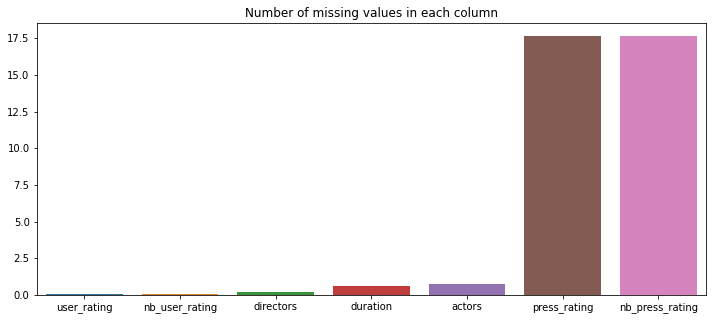

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1314 non-null   int64  
 1   title            1314 non-null   object 
 2   release_date     1314 non-null   object 
 3   duration         1306 non-null   float64
 4   genres           1314 non-null   object 
 5   directors        1311 non-null   object 
 6   actors           1304 non-null   object 
 7   nationality      1314 non-null   object 
 8   press_rating     1082 non-null   float64
 9   nb_press_rating  1082 non-null   float64
 10  user_rating      1313 non-null   float64
 11  nb_user_rating   1313 non-null   float64
 12  summary          1314 non-null   object 
 13  poster_link      1314 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 143.8+ KB


,id,duration,press_rating,nb_press_rating,user_rating,nb_user_rating
count,1314.000000,1306.000000,1082.000000,1082.000000,1313.000000,1313.000000
mean,190412.920852,114.133997,3.368669,20.210721,3.393222,12183.638233
std,100371.378919,22.899272,0.671301,9.405942,0.725331,20182.985813
min,62.000000,40.000000,1.000000,1.000000,0.900000,2.000000
25%,114985.500000,98.000000,2.900000,13.000000,2.900000,605.000000
50%,231904.000000,110.000000,3.400000,21.000000,3.500000,3518.000000
75%,274180.250000,126.000000,3.800000,27.000000,4.000000,15259.000000
max,303108.000000,242.000000,5.000000,45.000000,4.600000,175729.000000


In [8]:
m_stats = display_stats(movies)
m_stats

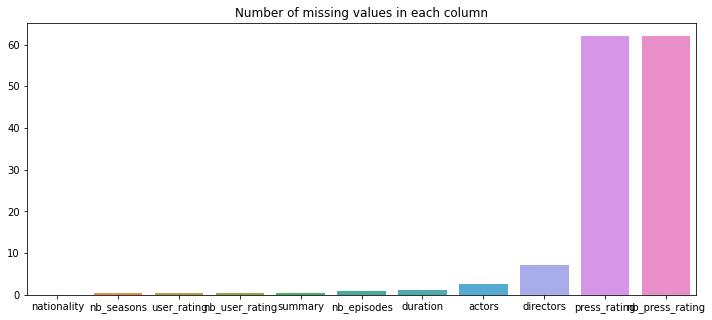

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1417 non-null   int64  
 1   title            1417 non-null   object 
 2   status           1417 non-null   object 
 3   release_date     1417 non-null   object 
 4   duration         1402 non-null   float64
 5   nb_seasons       1412 non-null   float64
 6   nb_episodes      1403 non-null   float64
 7   genres           1417 non-null   object 
 8   directors        1314 non-null   object 
 9   actors           1380 non-null   object 
 10  nationality      1416 non-null   object 
 11  press_rating     538 non-null    float64
 12  nb_press_rating  538 non-null    float64
 13  user_rating      1412 non-null   float64
 14  nb_user_rating   1412 non-null   float64
 15  summary          1412 non-null   object 
 16  poster_link      1417 non-null   object 
dtypes: float64(7),

,id,duration,nb_seasons,nb_episodes,press_rating,nb_press_rating,user_rating,nb_user_rating
count,1417.000000,1402.000000,1412.000000,1403.000000,538.000000,538.000000,1412.000000,1412.000000
mean,18410.076923,45.589872,3.462465,56.213115,3.320260,8.423792,3.582861,3858.217422
std,9185.343923,15.212255,3.973424,160.353704,0.598803,3.749457,0.607539,12297.334603
min,4.000000,3.000000,1.000000,1.000000,1.300000,1.000000,0.900000,1.000000
25%,11146.000000,42.000000,1.000000,10.000000,2.900000,6.000000,3.300000,126.000000
50%,21842.000000,45.000000,2.000000,20.000000,3.300000,8.000000,3.700000,482.000000
75%,25149.000000,55.000000,4.000000,52.000000,3.800000,10.000000,4.000000,2090.500000
max,31644.000000,150.000000,52.000000,4573.000000,5.000000,30.000000,4.700000,205979.000000


In [9]:
s_stats = display_stats(series)
s_stats

In [10]:
pm_stats = display_stats(press_movies)
pm_stats

No missing values in the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21582 entries, 0 to 21581
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   press_name    21582 non-null  object 
 1   movie_id      21582 non-null  int64  
 2   press_rating  21582 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 506.0+ KB


,movie_id,press_rating
count,21582.000000,21582.000000
mean,200088.014920,3.446159
std,85667.022665,1.097436
min,62.000000,1.000000
25%,135082.000000,3.000000
50%,230868.000000,4.000000
75%,269758.000000,4.000000
max,299394.000000,5.000000


In [11]:
ps_stats = display_stats(press_series)
ps_stats

No missing values in the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   press_name    4516 non-null   object 
 1   series_id     4516 non-null   int64  
 2   press_rating  4516 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 106.0+ KB


,series_id,press_rating
count,4516.00000,4516.000000
mean,19829.66519,3.379650
std,6495.73654,0.951869
min,49.00000,0.500000
25%,17464.00000,3.000000
50%,22019.00000,3.500000
75%,24397.00000,4.000000
max,30429.00000,5.000000


In [12]:
um_stats = display_stats(user_movies)
um_stats

No missing values in the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105711 entries, 0 to 105710
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      105711 non-null  object 
 1   user_name    105711 non-null  object 
 2   movie_id     105711 non-null  int64  
 3   user_rating  105711 non-null  float64
 4   date         105711 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB


,movie_id,user_rating
count,105711.000000,105711.000000
mean,177012.461220,3.302168
std,98340.085009,1.170735
min,62.000000,0.500000
25%,61764.000000,2.500000
50%,218229.000000,3.500000
75%,263209.000000,4.000000
max,302945.000000,5.000000


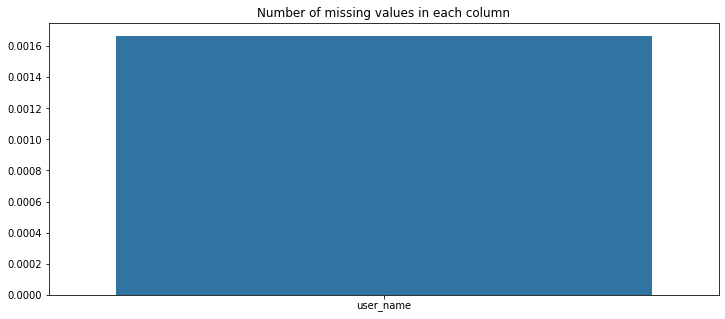

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60031 entries, 0 to 60030
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      60031 non-null  object 
 1   user_name    60030 non-null  object 
 2   series_id    60031 non-null  int64  
 3   user_rating  60031 non-null  float64
 4   date         60031 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


,series_id,user_rating
count,60031.000000,60031.000000
mean,15515.704053,3.584356
std,9351.003920,1.421383
min,4.000000,0.500000
25%,7634.000000,2.500000
50%,18752.000000,4.000000
75%,23563.000000,5.000000
max,31644.000000,5.000000


In [13]:
us_stats = display_stats(user_series)
us_stats

## **Save Cleaned datasets**

In [14]:
# Save all the dataframes from data in a csv file
def save_data(df: pd.DataFrame, path:str, name: str):
    # We create the folder if not exists
    os.makedirs(os.path.dirname(path), exist_ok=True)
    df.to_csv(f"{path}{name}.csv", index=False)
    print(f"File successfully saved in {path}{name}.csv")

In [15]:
path = "../Cleaned Data/"
for k,v in data.items():
    save_data(v, path, k)

File successfully saved in ../Cleaned Data/movies.csv
File successfully saved in ../Cleaned Data/series.csv
File successfully saved in ../Cleaned Data/press_movies.csv
File successfully saved in ../Cleaned Data/press_series.csv
File successfully saved in ../Cleaned Data/user_movies.csv
File successfully saved in ../Cleaned Data/user_series.csv


# **Section 1. Ratings Distributions**

## Plot the Distribution of Ratings 

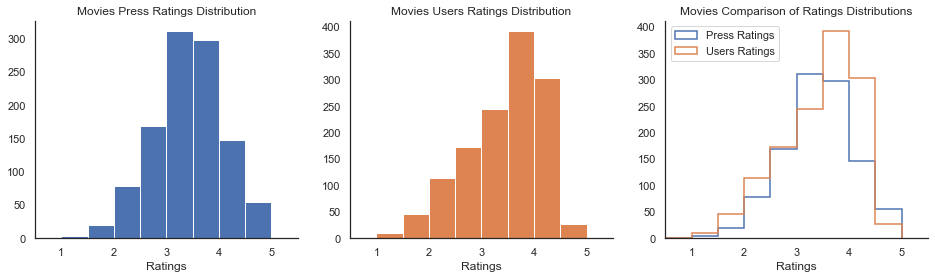

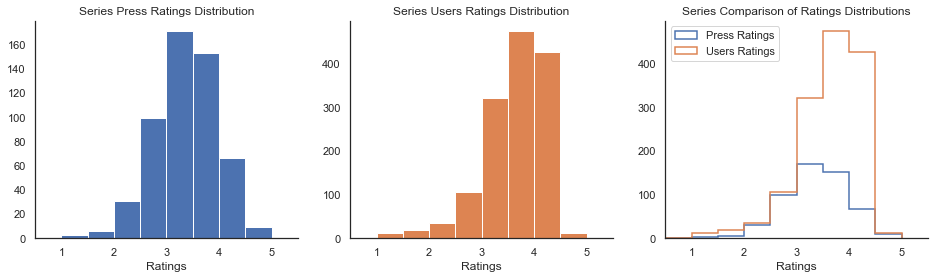

In [16]:
for k,df in list(data.items())[:2]:
    sns.set(style="white", palette="deep")

    fig, axes = plt.subplots(1, 3, figsize = (16,4))
    ax1, ax2, ax3 = fig.axes

    ax1.set_xlim([0.5,5.5])
    ax2.set_xlim([0.5,5.5])
    ax3.set_xlim([0.5,5.5])


    ax1.hist(df["press_rating"], bins = 10, range = (0,5), color='C0') # bin range = 1
    ax1.set_title(f'{k.title()} Press Ratings Distribution')
    ax1.set_xlabel('Ratings')

    ax2.hist(df["user_rating"], bins = 10, range = (0,5), color='C1') # bin range = 1
    ax2.set_title(f'{k.title()} Users Ratings Distribution')
    ax2.set_xlabel('Ratings')

    ax3.hist(df["press_rating"], bins = 10, range = (0,5), histtype = 'step', 
            lw=1.5, label='Press Ratings', color='C0')
    ax3.hist(df["user_rating"], bins = 10, range = (0,5), histtype = 'step', 
            lw=1.5, label='Users Ratings', color='C1')
    ax3.legend(loc = 'upper left')
    ax3.set_title(f'{k.title()} Comparison of Ratings Distributions')
    ax3.set_xlabel('Ratings')

    for ax in fig.axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [17]:
# save the fig
#fig.savefig('allocine-0_hist.png', bbox_inches='tight', dpi=200)

## Ratings Correlation

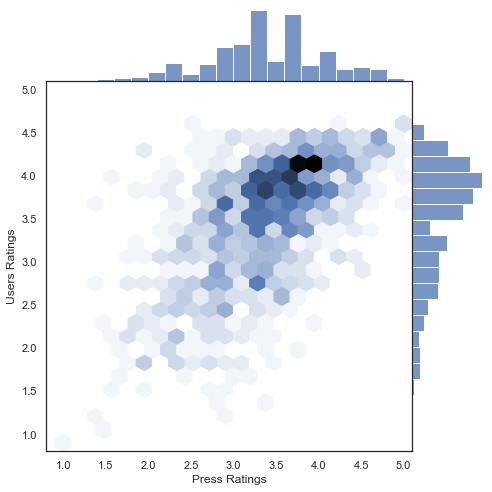

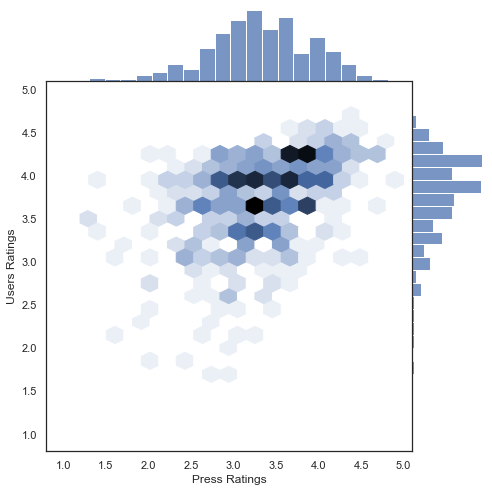

In [18]:
# Correlation between press_rating and user_rating
for k,df in list(data.items())[:2]:
    ax = sns.jointplot(x="press_rating", y="user_rating", 
                    data=df, kind="hex",
                    marginal_kws=dict(bins=20),
                    xlim=(0.8,5.1), ylim=(0.8,5.1),
                    height=7, space=0).set_axis_labels("Press Ratings", "Users Ratings")

In [19]:
# save the fig
#ax.savefig('allocine-1_jointplot.png', bbox_inches='tight', dpi=200)

## Compare to users ratings

five_stars = allocine[allocine["press_rating"] >= 5]
f, ax = plt.subplots(figsize=(15,6))
f.suptitle('Movies with Five Stars From The Press', 
           fontsize=13)
f.subplots_adjust(top=0.85)

sns.countplot(x=five_stars["user_rating"], ax=ax)
ax.set_xlabel("Users Ratings")
ax.set_ylabel("")
sns.despine(top=True, right=True, left=False, bottom=False)

### save the fig
f.savefig('allocine-2_hist5stars.png', bbox_inches='tight', dpi=200)

### # print the first tier and second tier of the Users Ratings
allocine[["user_rating"]].quantile([.33,.66])

p = (len(five_stars[(five_stars["user_rating"] < 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a low users ratings.'.format(round(p, 2)))
p = (len(five_stars[(five_stars["user_rating"] < 3.4) & (five_stars["user_rating"] >= 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a moderate users ratings.'.format(round(p, 2)))
p = (len(five_stars[five_stars["user_rating"] >= 3.4]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a high users ratings.'.format(round(p, 2)))

# **Section 3. Data Exploration**

## **GENRE**

### *Create `genres` dataframes*

In [20]:
def create_genre_df(df_key: str):
    # Get dataframe from key
    df = data.get(df_key)
    genre_df = None
    if df is not None:  
        df = df.copy()      
        # Remove all rows with no genres
        df.dropna(subset=["genres"], inplace=True)
        # Get all unique genres from df
        genres_list = [genre.lstrip() for genres in df["genres"] for genre in genres]
        genres_list = sorted(list(set(genres_list))) 
        # Create dataframe with the number of movies per genre from genres_list
        genre_df = pd.DataFrame({"genres": genres_list, f"nb_{df_key}": [df[df["genres"].apply(lambda x: genre in x).values].shape[0] for genre in genres_list]})

        # Add the nb_press_rating and nb_user_rating to the genre_df
        genre_df["nb_press_rating"] = [int(df[df["genres"].apply(lambda x: genre in x).values]["nb_press_rating"].sum()) for genre in genres_list]
        genre_df["nb_user_rating"] = [int(df[df["genres"].apply(lambda x: genre in x).values]["nb_user_rating"].sum()) for genre in genres_list]

        # Add the total_rating to the genre_df (press_rating + user_rating)
        genre_df["total_rating"] = genre_df["nb_press_rating"] + genre_df["nb_user_rating"]

        # Add the press_rating_percentage and user_rating_percentage to the genre_df 
        genre_df["press_rating_percentage"] = round(genre_df["nb_press_rating"] / genre_df["nb_press_rating"].values.sum() * 100, 3)
        genre_df["user_rating_percentage"] = round(genre_df["nb_user_rating"] / genre_df["nb_user_rating"].values.sum() * 100, 3)

        # Add the movies/series_percentage to the genre_df
        genre_df[f"{df_key}_percentage"] = round(genre_df[f"nb_{df_key}"]/df.shape[0] * 100, 3)
        return genre_df.sort_values(by = "genres", ascending = True)

In [21]:
m_genres_df = create_genre_df("movies")
s_genres_df = create_genre_df("series")

In [22]:
m_genres_df.head()

,genres,nb_movies,nb_press_rating,nb_user_rating,total_rating,press_rating_percentage,user_rating_percentage,movies_percentage
0,Action,244,3927,3901296,3905223,9.090,11.713,18.569
1,Animation,69,1152,676496,677648,2.666,2.031,5.251
2,Arts Martiaux,3,30,3307,3337,0.069,0.010,0.228
3,Aventure,153,2710,3237243,3239953,6.273,9.719,11.644
4,Biopic,52,1100,540799,541899,2.546,1.624,3.957


In [23]:
s_genres_df.head()

,genres,nb_series,nb_press_rating,nb_user_rating,total_rating,press_rating_percentage,user_rating_percentage,series_percentage
0,Action,156,531,608854,609385,5.246,5.338,11.009
1,Animation,94,51,176653,176704,0.504,1.549,6.634
2,Arts Martiaux,7,10,14235,14245,0.099,0.125,0.494
3,Aventure,95,341,371684,372025,3.369,3.259,6.704
4,Biopic,37,137,32762,32899,1.353,0.287,2.611


In [24]:
print(m_genres_df.genres.values)
print(s_genres_df.genres.values)

['Action' 'Animation' 'Arts Martiaux' 'Aventure' 'Biopic' 'Comédie'
 'Comédie dramatique' 'Comédie musicale' 'Drame' 'Epouvante-horreur'
 'Erotique' 'Espionnage' 'Famille' 'Fantastique' 'Guerre' 'Historique'
 'Judiciaire' 'Musical' 'Policier' 'Péplum' 'Romance' 'Science fiction'
 'Sport event' 'Thriller' 'Western']
['Action' 'Animation' 'Arts Martiaux' 'Aventure' 'Biopic' 'Comédie'
 'Comédie dramatique' 'Comédie musicale' 'Dessin animé' 'Documentaire'
 'Drame' 'Epouvante-horreur' 'Erotique' 'Espionnage' 'Famille'
 'Fantastique' 'Guerre' 'Historique' 'Judiciaire' 'Musical' 'Médical'
 'Policier' 'Péplum' 'Romance' 'Science fiction' 'Show' 'Soap'
 'Sport event' 'Thriller' 'Websérie' 'Western']


### *Save all `genres` dataframes*

In [25]:
path = "../Cleaned Data/"
save_data(m_genres_df, path, "m_genres")
save_data(s_genres_df, path, "s_genres")

File successfully saved in ../Cleaned Data/m_genres.csv
File successfully saved in ../Cleaned Data/s_genres.csv


## **NATIONALITY**

### *Create `nationality` dataframes*

In [26]:
def create_nationality_df(df_key: str):
    # Get dataframe from key
    df = data.get(df_key)
    nation_df = None
    if df is not None:        
        df = df.copy()
        # Remove all rows with no nationality
        df.dropna(subset=["nationality"], inplace=True)
        # Get all unique nationality from df
        nationality = [nat.lstrip() for nationality in df["nationality"] for nat in nationality]
        nationality = sorted(list(set(nationality))) 
        # Create dataframe with the number of movies per nationality from nationality list
        nation_df = pd.DataFrame({"nationality": nationality, f"nb_{df_key}": [df[df["nationality"].apply(lambda x: nation in x).values].shape[0] for nation in nationality]})

        # Add the nb_press_rating and nb_user_rating to the nation_df
        nation_df["nb_press_rating"] = [int(df[df["nationality"].apply(lambda x: nation in x).values]["nb_press_rating"].sum()) for nation in nationality]
        nation_df["nb_user_rating"] = [int(df[df["nationality"].apply(lambda x: nation in x).values]["nb_user_rating"].sum()) for nation in nationality]

        # Add the total_rating to the nation_df (press_rating + user_rating)
        nation_df["total_rating"] = nation_df["nb_press_rating"] + nation_df["nb_user_rating"]

        # Add the press_rating_percentage and user_rating_percentage to the nation_df 
        nation_df["press_rating_percentage"] = round(nation_df["nb_press_rating"] / nation_df["nb_press_rating"].values.sum() * 100, 4)
        nation_df["user_rating_percentage"] = round(nation_df["nb_user_rating"] / nation_df["nb_user_rating"].values.sum() * 100, 4)

        # Add the movies/series_percentage to the nation_df
        nation_df[f"{df_key}_percentage"] = round(nation_df[f"nb_{df_key}"]/df.shape[0] * 100, 4)
        return nation_df.sort_values(by = "nationality", ascending = True)

In [27]:
m_nationality_df = create_nationality_df("movies")
s_nationality_df = create_nationality_df("series")

In [28]:
m_nationality_df.head()

,nationality,nb_movies,nb_press_rating,nb_user_rating,total_rating,press_rating_percentage,user_rating_percentage,movies_percentage
0,Algeria,4,30,4996,5026,0.0934,0.0226,0.3044
1,Argentina,7,95,14495,14590,0.2957,0.0655,0.5327
2,Australia,18,262,333797,334059,0.8155,1.5074,1.3699
3,Austria,6,143,13499,13642,0.4451,0.0610,0.4566
4,Belgium,79,1752,284035,285787,5.4535,1.2827,6.0122


In [29]:
s_nationality_df.head()

,nationality,nb_series,nb_press_rating,nb_user_rating,total_rating,press_rating_percentage,user_rating_percentage,series_percentage
0,Afrique du Sud,2,14,3068,3082,0.2743,0.0526,0.1412
1,Allemagne,35,74,46837,46911,1.4501,0.8028,2.4718
2,Argentine,5,0,1272,1272,0.0000,0.0218,0.3531
3,Australie,16,11,14614,14625,0.2156,0.2505,1.1299
4,Autriche,4,7,516,523,0.1372,0.0088,0.2825


In [30]:
print(m_nationality_df.nationality.values)
print(s_nationality_df.nationality.values)

['Algeria' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia' 'Bosnia'
 'Brazil' 'Byelorussia' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Czech Republic' 'Denmark' 'Dominican Republic' 'Egypt'
 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Hongkong'
 'Hungary' 'Iceland' 'India' 'Iran' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Latvia' 'Lebanon' 'Luxembourg' 'Malawi' 'Mexico' 'Morocco' 'Netherlands'
 'New Zealand' 'Nigeria' 'Norway' 'Peru' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Samoa' 'Serbia' 'Singapore' 'Slovenia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Taiwan' 'Thaïland' 'Turkey'
 'USA' 'Ukraine' 'United Arab Emirates' 'United Kingdom' 'Uruguay'
 'Vietnam' 'West Germany']
['Afrique du Sud' 'Allemagne' 'Argentine' 'Australie' 'Autriche'
 'Belgique' 'Brésil' 'Canada' 'Chine' 'Colombie' 'Corée du Sud' 'Croatie'
 'Danemark' 'Egypte' 'Espagne' 'Finlande' 'France' 'Grande-Bretagne'
 'Hongrie' 'Inde' 'Iran' 'Irlande' 'Islande' 'Israë

### *Save all `nationality` dataframes*

In [31]:
path = "../Cleaned Data/"
save_data(m_nationality_df, path, "m_nationality")
save_data(s_nationality_df, path, "s_nationality")

File successfully saved in ../Cleaned Data/m_nationality.csv
File successfully saved in ../Cleaned Data/s_nationality.csv


## **Some Analysis**

In [32]:
def movies_per_genres(genre_df: pd.DataFrame, name: str):
    # Hist of the percentage of movies per genre
    ax = sns.barplot(x="genres", y=f"{name}_percentage", data=genre_df, color="C2")
    ax.set_title(f"Percentage of {name} per genre")
    ax.set_xlabel("Genre")
    ax.set_ylabel(f"Percentage of {name}")

    # Pretty print x axis names
    for i, genre in enumerate(ax.get_xticklabels()):
        genre.set_rotation(90)
        genre.set_horizontalalignment('center')
        genre.set_position((i, 0))

    # Print the data values on top of the bars
    '''
    for i, genre in enumerate(ax.patches):
        ax.text(genre.get_x() + genre.get_width()/2.,
                genre.get_height() + 0.5,
                str(genre_df.iloc[i][f"{name}_percentage"]) + "%",
                ha='center',
                color='black',
                fontsize=10)'''

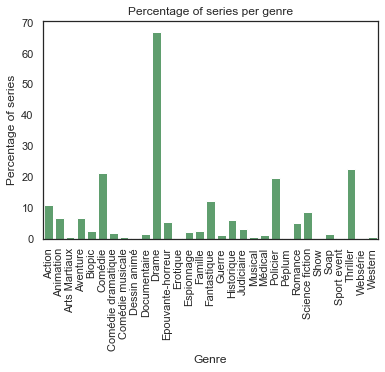

In [33]:
movies_per_genres(s_genres_df,name="series")

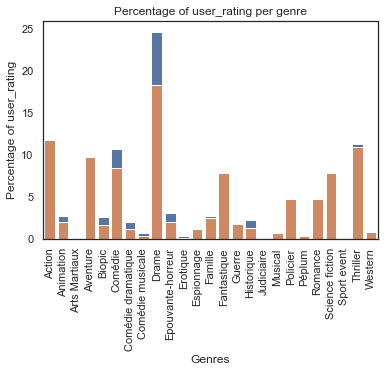

In [34]:
# Hist of the percentage of press_rating per genre
ax = sns.barplot(x="genres", y="press_rating_percentage", data=m_genres_df, color="C0")
ax.set_title("Percentage of press_rating per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Percentage of press_rating")

# Pretty print x axis names
for i, genre in enumerate(ax.get_xticklabels()):
    genre.set_rotation(90)
    genre.set_horizontalalignment('center')
    genre.set_position((i, 0))
# Hist of the percentage of user_rating per genre
ax = sns.barplot(x="genres", y="user_rating_percentage", data=m_genres_df, color="C1")
ax.set_title("Percentage of user_rating per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Percentage of user_rating")

# Pretty print x axis names
for i, genre in enumerate(ax.get_xticklabels()):
    genre.set_rotation(90)
    genre.set_horizontalalignment('center')
    genre.set_position((i, 0))
### Number of ratings per genre
### Average ratings per genre